# COGS 108 - Final Project 

# Overview

I decided to conduct research on whether there was a positive correlation between San Diego park Yelp ratings and the location of these parks represented by longitude and latitude values. I performed a few different analytical methods such as checking feature correlations and creating a machine learning model. The results from my analysis show that there is no correlation between San Diego park Yelp ratings and park locations represented by longitude and latitude values.

# Name & GitHub

- Name: Anthony Fong
- GitHub Username: ajf01

# Research Question

Is there a positive correlation between San Diego park yelp ratings and the location of a park represented by their longitude and latitude values?

## Background and Prior Work

When deciding where a business should be built there are many things to take into consideration. One of the most important things to decide on is location. Forbes, one of Americas leading business magazines, in one of their online articles explains how even with the rise of online commerce location will always play a role in business development (Forbes). Though does this concept apply to public parks? Parks, as explained by Eastern Kentucky Univeristy, have the social purpose to "provide identity for citizens and are a major factor in the perception of quality of life in a given community"  (Eastern Kentucky University). So, if parks carry meaning only for their given community then location should not effect the rating of a park. Rather the quality of the park should be the only factor in ratings. To test this theory is why I have proposed a research question to investigate the correlation between yelp ratings for a park and the parks longitude and latitude values.

Currently I have not found any previous research done on my specific research question. The closest thing I could find is a blog post made on WEBEminence by Ryan Bowman on a related topic. Ryan Bowman hosts a Q&A series called WEask.tv. In his WEBEminence blog post he covers how location can affect the ranking system on Google (WEBEminence). Depending on where the location of a business is Google may rank them highly and return the business often in search queries or not. This research shows that at the very least Google can affect how many people know about a park based on its location. Though this does not imply that the location of a park will effect their yelp rating. Even if there is lower attendence to a park due to their location, those who end up visiting the park should in theory still rate the park based on the quality.

References (include links):
- 1) Forbes (https://www.forbes.com/sites/williamcraig/2015/01/16/why-location-does-and-doesnt-matter-for-entrepreneurial-success/?sh=554914624bf6)

- 2) Eastern Kentucky University (https://recreation.eku.edu/importance-parks-and-recreation)

- 3) WEBEminence (https://webeminence.com/physical-location-proximiity-google-rankings/)

# Hypothesis


My hypothesis is that there is no correlation between the Yelp ratings of San Diego parks and their locations as represented by longitude and latitude values. I believe this hypothesis to be true, because a park holds value in the community it is in. If I wanted to go for a stroll or play basketball I would go to my local park not a park in a nice location.

# Dataset(s)

- Dataset Name: San Diego Parks Yelp Data (yelp_SD_parks.csv)
- Link to the dataset: https://www.yelp.com/
- Number of observations: 833

The first dataset I used was the San Diego parks yelp ratings data which contained information on the average rating for a park in San Diego. The dataset had 833 observations with 10 columns and contained information on what the park is called, where it is located, what the phone number is if the park has one, the url to the yelp page, the amount of reviews the park has, and what the average rating for the park is. For my analysis specifically I used the columns rating, longitude, and latitude.

- Dataset Name: San Diego Parks Yelp Data (yelp_SD_reviews.csv)
- Link to the dataset: https://www.yelp.com/
- Number of observations: 2333

The second dataset I used was the San Diego parks yelp reviews data which contained information on what review and rating was left for a park by a yelp user. The dataset had 2333 observations with 3 columns and contained information on what park is being reviewed, what rating a user gave that park, and what written review was left by the user. For my analysis specifically I used the columns rating and text.

I am using two datasets, and since they are both from the same source I plan to merge them together. I will be merging the two yelp datasets together using an inner join. The key column for yelp_SD_parks.csv will be name and the key column for yelp_SD_reviews.csv will be id.

# Setup

In [2]:
import numpy as np
import pandas as pd

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (15, 5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

I first started out my data cleaning by reading in the data of both datasets I am using. Both datasets were already in csv files so there was no issues with reading in the data using pandas read_csv method. After I read in the datasets I used the pandas head method to get oriented with what both datasets had to offer. Once I found the necessary columns I needed I dropped the rest to minimize the dataframe size. I then merged both datasets together on the name column found in yelp_SD_parks.csv and the id column found in yelp_SD_reviews.csv. Once I merged the datasets together I dropped the columns I used to merge the datasets as I would not need them for my research question. I also renamed rating_y to rating.

Now that I had my merged dataset with only the features I wanted I decided to check for NaN values. I found that there was only one NaN value at row 679. I decided to drop this row as the NaN values appeared in both the longitude and latitude feature columns. Since my research question requires information from both those columns I had no use for a row where they were NaN. I also could not discover their values through other columns, and imputation would not work here either.

After I removed the single row that contained NaN values I reset the index. I also created two new columns that I added to the dataframe. One column I named review_len and it stored the length of every review in terms of the amount of characters in the review string. Another column I named dog and it stored binary values 1 for if a review had the word dog in it, and 0 if the review did not have the word dog in it. I planned to use these two additional columns to see if rating might have a correlation with columns that are not related to location. After all these steps I determined the dataset to be clean and ready to go as there were no missing values, all columns stored the data type they should, and any unnecessary columns were removed.

In [3]:
yelp = pd.read_csv('../data/yelp_SD_parks.csv')
reviews = pd.read_csv('../data/yelp_SD_reviews.csv')

In [4]:
yelp.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [5]:
reviews.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


In [6]:
yelp = yelp.drop(columns=['phone','id','url','is_closed'])
combined = yelp.merge(reviews,left_on='name',right_on='id')

In [7]:
combined

,name,address,rating_x,review_count,longitude,latitude,id,rating_y,text
0,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,2105,-117.153150,32.734502,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,2105,-117.153150,32.734502,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,2105,-117.153150,32.734502,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5,46,-117.147278,32.778315,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5,46,-117.147278,32.778315,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."
...,...,...,...,...,...,...,...,...,...
2414,Petco Park,"100 Park Blvd San Diego, CA 92101",4.0,1667,-117.157054,32.707246,Petco Park,5,I have visited over 27 MLB Ballparks including...
2415,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",3.0,50,-117.316419,33.171137,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...
2416,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",3.0,50,-117.316419,33.171137,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t..."
2417,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",3.0,50,-117.316419,33.171137,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...


In [8]:
combined = combined.drop(columns=['name','address','rating_x','id'])
combined = combined.rename(columns={'rating_y': 'rating'})

In [9]:
combined[combined.isna().any(axis=1)]

,review_count,longitude,latitude,rating,text
679,1,NaN,NaN,4,A nice neighborhood park a couple blocks from ...


In [10]:
combined = combined.drop(679).reset_index(drop=True)

In [11]:
review_len = [len(x) for x in combined['text']]
combined['review_len'] = review_len
dog = [1 if 'dog' in x.lower() else 0 for x in combined['text']]
combined['dog'] = dog

In [12]:
combined

,review_count,longitude,latitude,rating,text,review_len,dog
0,2105,-117.153150,32.734502,5,Balboa Park is a must see when coming to San D...,159,0
1,2105,-117.153150,32.734502,5,Beautiful grounds even to take a stroll during...,124,1
2,2105,-117.153150,32.734502,5,Beautiful sightseeing in San Diego. Lots of wa...,159,0
3,46,-117.147278,32.778315,5,Was invited to child's B-Day party pre Covid-1...,151,0
4,46,-117.147278,32.778315,5,"Pretty nice park, beautiful design. Anyone is...",155,0
...,...,...,...,...,...,...,...
2413,1667,-117.157054,32.707246,5,I have visited over 27 MLB Ballparks including...,154,0
2414,50,-117.316419,33.171137,4,No grass here but it's a great dog park. if yo...,154,1
2415,50,-117.316419,33.171137,3,"I love taking our cholate lab here, however, t...",82,0
2416,50,-117.316419,33.171137,3,Pretty small dog park overall. The center of t...,155,1


# Data Analysis & Results

## EDA

Utilized the pandas corr and describe function to gain insight on variable correlations and descriptive statistics for each column

In [13]:
combined.corr()

,review_count,longitude,latitude,rating,review_len,dog
review_count,1.000000,-0.008849,-0.068894,0.106820,0.015161,-0.036206
longitude,-0.008849,1.000000,-0.674873,0.012861,0.000422,-0.010826
latitude,-0.068894,-0.674873,1.000000,-0.001798,-0.007253,0.042162
rating,0.106820,0.012861,-0.001798,1.000000,-0.011674,-0.051147
review_len,0.015161,0.000422,-0.007253,-0.011674,1.000000,-0.006814
dog,-0.036206,-0.010826,0.042162,-0.051147,-0.006814,1.000000


In [14]:
combined.describe()

,review_count,longitude,latitude,rating,review_len,dog
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,209.132341,-117.174287,32.847480,4.178246,153.842018,0.063689
std,755.751799,0.172263,0.228117,1.240300,10.855687,0.244249
min,1.000000,-118.641880,32.532675,1.000000,34.000000,0.000000
25%,7.000000,-117.219174,32.731552,4.000000,154.000000,0.000000
50%,25.000000,-117.158731,32.780510,5.000000,156.000000,0.000000
75%,122.750000,-117.110592,32.906693,5.000000,158.000000,0.000000
max,14195.000000,-116.377618,34.297157,5.000000,160.000000,1.000000


Checked the distribution of ratings using the value_counts method and got the average review length per star rating

In [15]:
combined['rating'].value_counts()

5    1406
4     533
1     211
3     194
2      74
Name: rating, dtype: int64

In [16]:
combined.groupby('rating').mean()

,review_count,longitude,latitude,review_len,dog
rating,,,,,
1,72.672986,-117.184536,32.855290,154.189573,0.061611
2,61.324324,-117.188772,32.835251,154.783784,0.094595
3,78.809278,-117.169272,32.842845,153.036082,0.103093
4,127.594747,-117.168136,32.845885,154.198874,0.095685
5,286.282361,-117.175011,32.848195,153.716216,0.044808


#### Visualizations

Created a scatterplot to check the relationship between the length of a review in characters and the rating given. It seems that for the most part there is no real correlation. There are 5 star ratings for reviews with as little as 80 characters and as much as 160 characters. There are a few outliers that have 5 star reviews with only 60 characters.

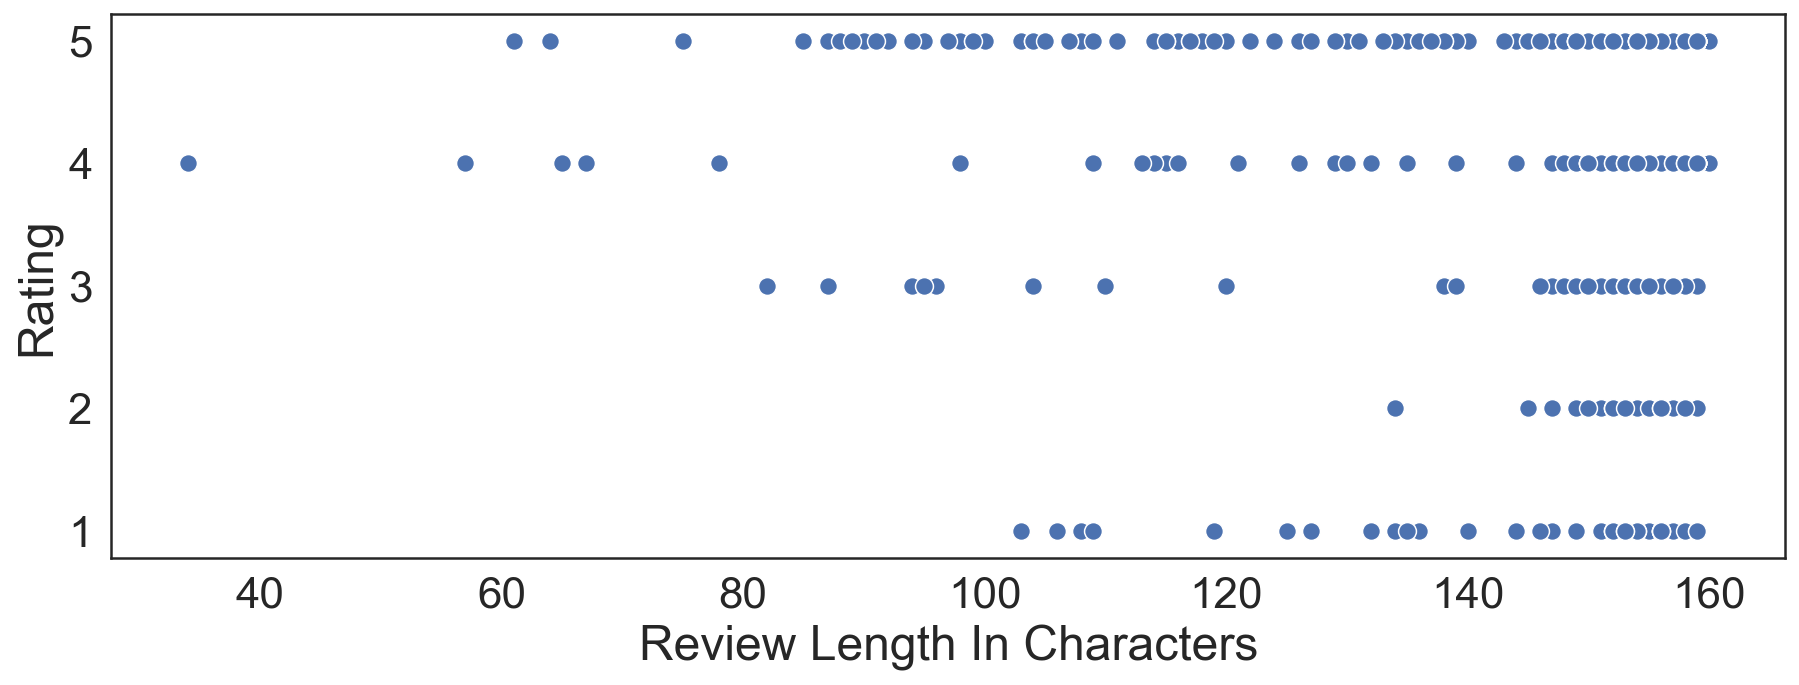

In [17]:
sns.scatterplot(x='review_len', y='rating', data=combined, s=80)
plt.xlabel('Review Length In Characters')
plt.ylabel('Rating');

Histograms of both the ratings and review length in characters were created below. These plots show the distribution of values for both review length and ratings. It is clear that both features are left skewed from the distributions shown below. This means that the dataset is not very balanced. Most ratings are 5 stars and most reviews are around 150 characters. The distributions are not normal and as such many assumptions made for neat and clean data can not be made here.

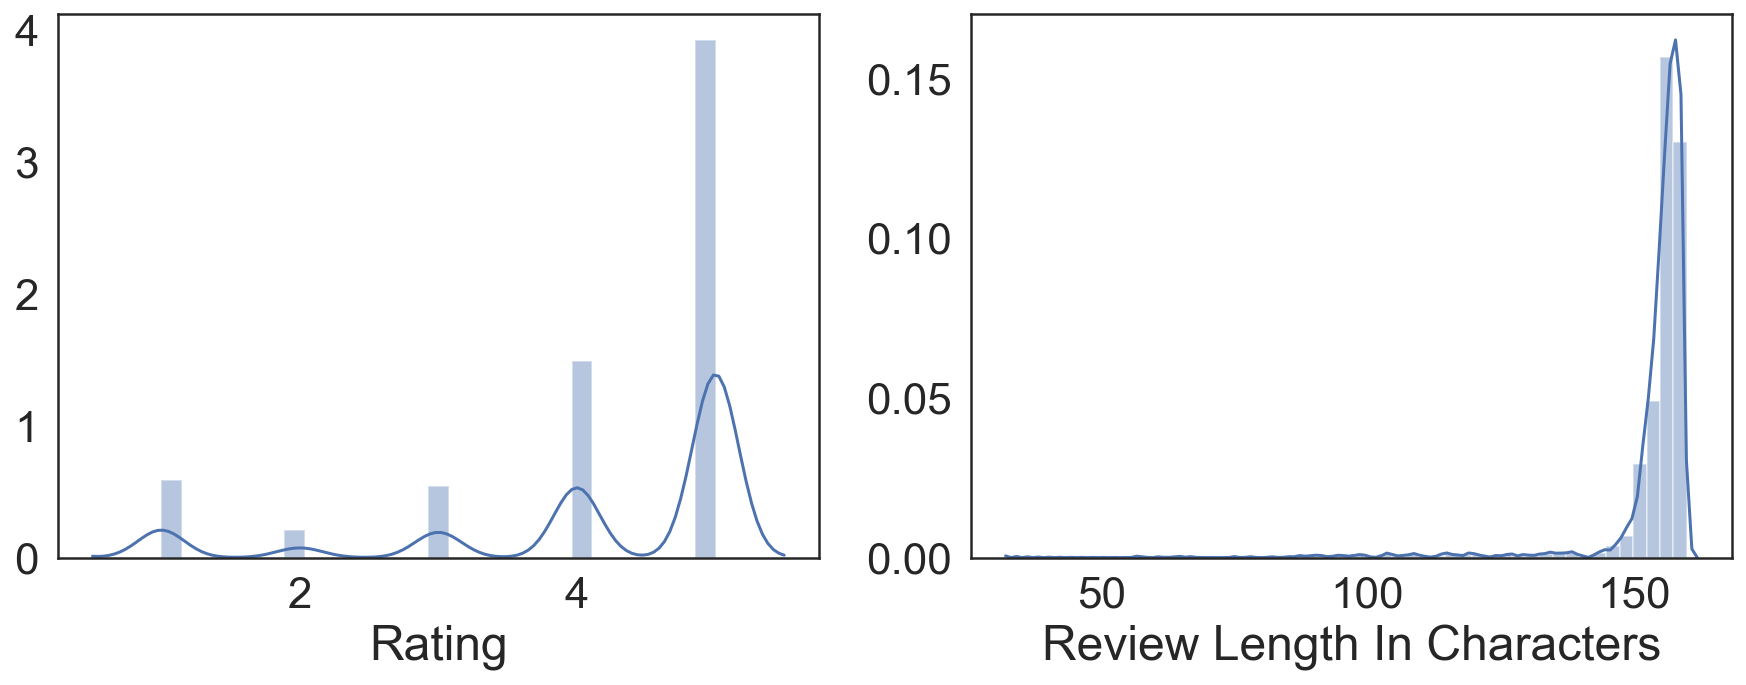

In [18]:
plt.subplot(1, 2, 1)
sns.distplot(combined['rating'])
plt.xlabel('Rating')

plt.subplot(1, 2, 2)
sns.distplot(combined['review_len'])
plt.xlabel('Review Length In Characters');

Histograms of both the longitude and latitude values were created below. These plots show the distribution of values for both longitude and latitude. Longitude appears somewhat normal with a slight skew to the left, and latitude appears to be right skewed. Though notice how the values do not change much on the x-axis. This is to be expected as all parks are located in San Diego so their longitude and latitude values should be relatively close together. These histograms merely show that most parks in the data are relatively close together with a few parks being built on the outskirts of San Diego.

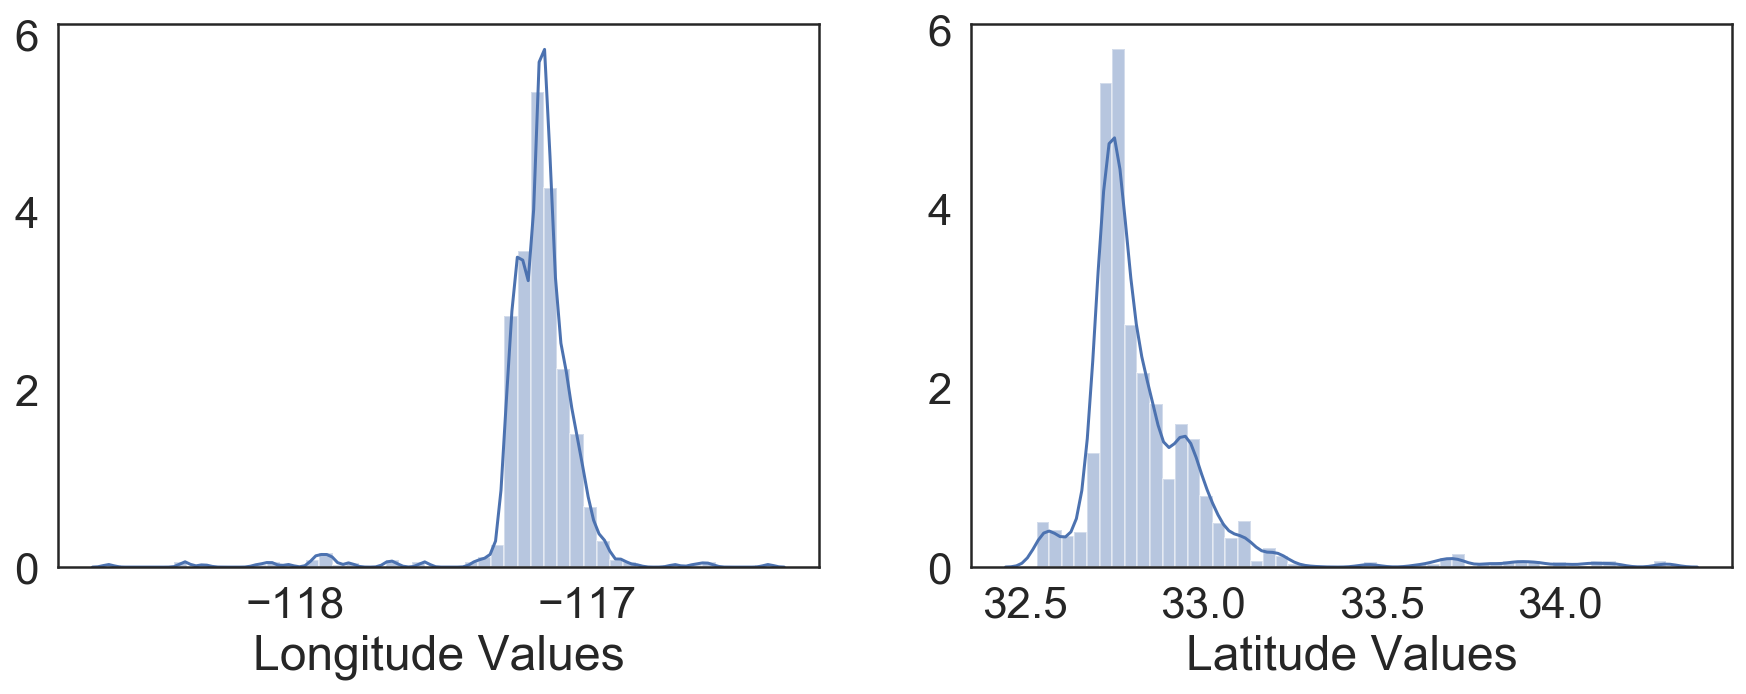

In [19]:
plt.subplot(1, 2, 1)
sns.distplot(combined['longitude'])
plt.xlabel('Longitude Values')

plt.subplot(1, 2, 2)
sns.distplot(combined['latitude'])
plt.xlabel('Latitude Values');

## Analysis

I tried to determine correlation between variables using the pandas built in corr function and different types of plots created using seaborn. I choose to use the pandas corr function as it directly tells me the correlation between variables. With the information returned from corr I could have already made a conclusion, but I wanted to verify the results through other methods as well. The visualizations I created allowed me to check the distribution of values in my features. Through these plots I was able to reaffirm the results from the pandas corr function.

Below I have code that trains a logistic regression model using features found in my table. Logistic regression was chosen here as I treated predicting the discrete 5 ratings as a classification problem. I wanted to conduct an ablation study approach to see if a machine learning model could discover any relationships between features that I was unable to find through my methods. A total of 4 ablation studies were conducted with a different set of features removed or added to the analysis each time.

My results for all my approaches showed that there is no correlation between the location of a park and the yelp rating it receives. Using the pandas corr function it was shown that rating had close to 0 correlation with both longitude and latitude values. Using the visualizations it was shown that rating is not normally distributed, and most ratings are 5 stars. Longitude and latitude, however, had different looking distributions. This means that longitude and latitude were unlikely to predict rating as the distributions do not align. Through logistic regression and standard ablation study approaches it was shown that no matter what combination of features longitutde and latitude did not score a high accuracy with predicting ratings. In fact all accurracies scored below 25%.

First ablation study using only longitude and latitude to predict rating. The code below uses train_test_split from sklearn to randomly split the dataset into training and test sets. I then train the logistic regression model using the training set and create predictions with the test set. A for loop is used to check the accuracy of the model.

In [20]:
abl_study = combined.drop(columns=['review_count', 'text', 'rating', 'review_len', 'dog'])
x_train,x_test,y_train,y_test=train_test_split(abl_study,combined['rating'],test_size=0.3)

In [21]:
clf = LogisticRegression(class_weight='balanced',max_iter=500).fit(x_train,y_train)
pred = clf.predict(x_test)

In [22]:
correct = 0
y_lst = y_test.tolist()
for x in range(len(pred)):
    if pred[x] == y_lst[x]:
        correct += 1

# accuracy
accuracy = correct/len(pred)
{'Accuracy':accuracy}

{'Accuracy': 0.2369146005509642}

Second ablation study using longitude, latitude, and review_len to predict rating. The code below uses train_test_split from sklearn to randomly split the dataset into training and test sets. I then train the logistic regression model using the training set and create predictions with the test set. A for loop is used to check the accuracy of the model.

In [23]:
abl_study2 = combined.drop(columns=['review_count', 'text', 'rating', 'dog'])
x_train2,x_test2,y_train2,y_test2=train_test_split(abl_study2,combined['rating'],test_size=0.3)

In [24]:
clf2 = LogisticRegression(class_weight='balanced',max_iter=500).fit(x_train2,y_train2)
pred2 = clf2.predict(x_test2)

In [25]:
correct2 = 0
y_lst2 = y_test2.tolist()
for x in range(len(pred2)):
    if pred2[x] == y_lst2[x]:
        correct2 += 1

# accuracy
{'Accuracy': correct2/len(pred2)}

{'Accuracy': 0.05371900826446281}

Third ablation study using every column but text to predict rating. The code below uses train_test_split from sklearn to randomly split the dataset into training and test sets. I then train the logistic regression model using the training set and create predictions with the test set. A for loop is used to check the accuracy of the model.

In [26]:
abl_study3 = combined.drop(columns=['text', 'rating'])
x_train3,x_test3,y_train3,y_test3=train_test_split(abl_study3,combined['rating'],test_size=0.3)

In [27]:
clf3 = LogisticRegression(class_weight='balanced',max_iter=500).fit(x_train3,y_train3)
pred3 = clf3.predict(x_test3)

In [28]:
correct3 = 0
y_lst3 = y_test3.tolist()
for x in range(len(pred3)):
    if pred3[x] == y_lst3[x]:
        correct3 += 1

# accuracy
{'Accuracy': correct3/len(pred3)}

{'Accuracy': 0.2231404958677686}

Fourth ablation study using every column but longitude, latitude, and text to predict rating. The code below uses train_test_split from sklearn to randomly split the dataset into training and test sets. I then train the logistic regression model using the training set and create predictions with the test set. A for loop is used to check the accuracy of the model.

In [29]:
abl_study4 = combined.drop(columns=['longitude', 'latitude', 'text', 'rating'])
x_train4,x_test4,y_train4,y_test4=train_test_split(abl_study4,combined['rating'],test_size=0.3)

In [30]:
clf4 = LogisticRegression(class_weight='balanced',max_iter=500).fit(x_train4,y_train4)
pred4 = clf4.predict(x_test4)

In [31]:
correct4 = 0
y_lst4 = y_test4.tolist()
for x in range(len(pred4)):
    if pred4[x] == y_lst4[x]:
        correct4 += 1

# accuracy
{'Accuracy': correct4/len(pred4)}

{'Accuracy': 0.19421487603305784}

# Ethics & Privacy

There are ethical and privacy related issues involving my research question and dataset. My research question asks about yelp ratings on parks and their correlation with their location as represented by longitude and latitude values. Yelp is a platform where users give ratings and write reviews for locations they have been to. When scraping for this data it is imperative that user identifying information is removed as the users on Yelp did not give consent to be part of my research. The dataset I used for this specific project was scraped by professor Ellis so for the most part any user identifying information was already removed ahead of time.

There is still the question of whether I am allowed to use this data to begin with. Since the data was scraped through Yelp's api I believe that I am allowed to use this data. Nothing was scraped using third party software, and all guidelines defined by the Yelp api were followed. The research question I am asking, however, does pose a large ethical concern. My findings if they turned out to be against my hypothesis, could change where cities decide to build their parks. This could leave areas deemed as less "desirable" to be negatively impacted as the city may choose to build the park somewhere more "desireable". To adress this issue I would be certain to advise the city council, or whoever read my report that the data I have is limited. I am only using one platform for all my review data which is hardly representative of the San Diego city population. As such my results should not be taken as absolutes, and my research here is merely something to think about as a side note.

Though as mentioned there is bias in the data I used. Yelp data of course only carries information from Yelp users. This does not encompass all visitors of San Diego parks. There might be many individuals who disliked, liked, or did not care about a park's location, but because they did not write about it on Yelp they would not be represented in the data. Unfortunately I do not have access to an ideal dataset, and as such I can not get full representation from the entire city of San Diego. As such I must again caution the use of my research results in a general format. My research pertains to the parks available in San Diego only, and only utilizes reviews found on Yelp.

# Conclusion & Discussion

The research question I set out to answer is is there a positive correlation between yelp ratings for San Diego parks and their location represented by longitutde and latitude values. To conduct research on this research question I utilized the yelp datasets provided by professor Ellis. The two datasets provided information on a variety of things such as what the average rating for a park is, what the individual user rating for a park is, the review a user left, the longitude and latitude of the park, etc. I began my analysis by cleaning and formatting the data to the way I wanted it. I removed all unnecessary columns and any rows containing NaN values. I then checked the distribution of rating values as well as the correlation between rating and every other column. Lastly I created a machine learning model using logistic regression to see if there were any hidden trends in the data that a machine learning model could pick up.

From my analysis I can conclude that my original hypothesis is correct. There is no positive correlation or any correlation between park rating and the park location represented as longitude and latitude values. Rating had 0.012861 and -0.001798 as correlation values for longitude and latitude respectively. These are extremely small values close to zero. So, technically rating had a positive correlation with longitude values and a negative correlation with latitude values, but the correlation is so small I will be treating it as zero correlation. The logistic regression model also could not find any relationship between rating and longitude or latitude values having scored a 23.97% accuracy when trying to predict rating with only longitude and latitude values. This score is worse than a trivial predicter that only predicts 5 star for every park.

Even if my results support my hypothesis there is still a chance my hypothesis could be wrong as there were limitations on this research. The dataset I used was missing many features from Yelp that could have been helpful in the research. One such feature missing was time a review was made. Perhaps there is a correlation between what time a review is made, and what location a user decides to go to. The dataset was also very imbalanced. More than half the Yelp ratings were 5 stars. Very few individuals gave ratings below 5 stars, so it is difficult to determine correlation between variables when the dataset is so imbalanced. There is also of course the limitation that my data only contains Yelp users. My research results could be used to determine where San Diego future parks will be built. Since my results show that there is no correlation between Yelp ratings and the location of a park represented by longitude and latitude values local authorities may think that parks can be built anywhere and people will still enjoy them. I want to make clear that my research had limitations from the datasets, and that no concrete stance should be made from my research results alone.